In [1]:
(0.2*0.5)/(0.3*0.05+0.2*0.5+0.5*0.05)

[1] 0.7142857

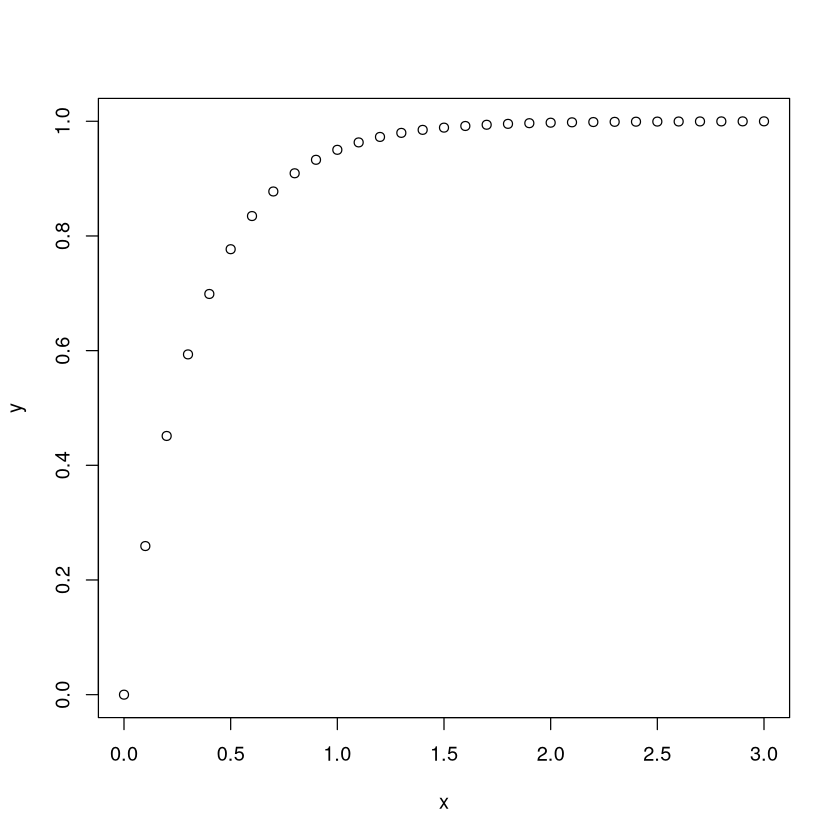

In [2]:
x = seq(0,3,0.1)
y = pexp(x,3)
plot(x,y)

In [3]:
1-pexp(0.5,3)

[1] 0.2231302

In [5]:
qexp(0.01,3)*3600


[1] 12.0604

In [6]:
x = c(0,1,2)
p = c(0.25,0.5,0.25)



In [8]:
ex = sum(x*p)
ex

[1] 1

In [9]:
exx = sum(x*x*p)
exx
dx = exx -ex*ex
dx
sqrt(dx)

[1] 1.5

[1] 0.5

[1] 0.7071068

In [10]:

library(readxl)

In [12]:
data = read_xlsx("ZtracenePonozky.xlsx")
head(data)

kotnikove,podkolenky,obycejne
<dbl>,<dbl>,<dbl>
8,4,12
7,3,10
3,9,9
7,9,11
6,9,10
5,7,6


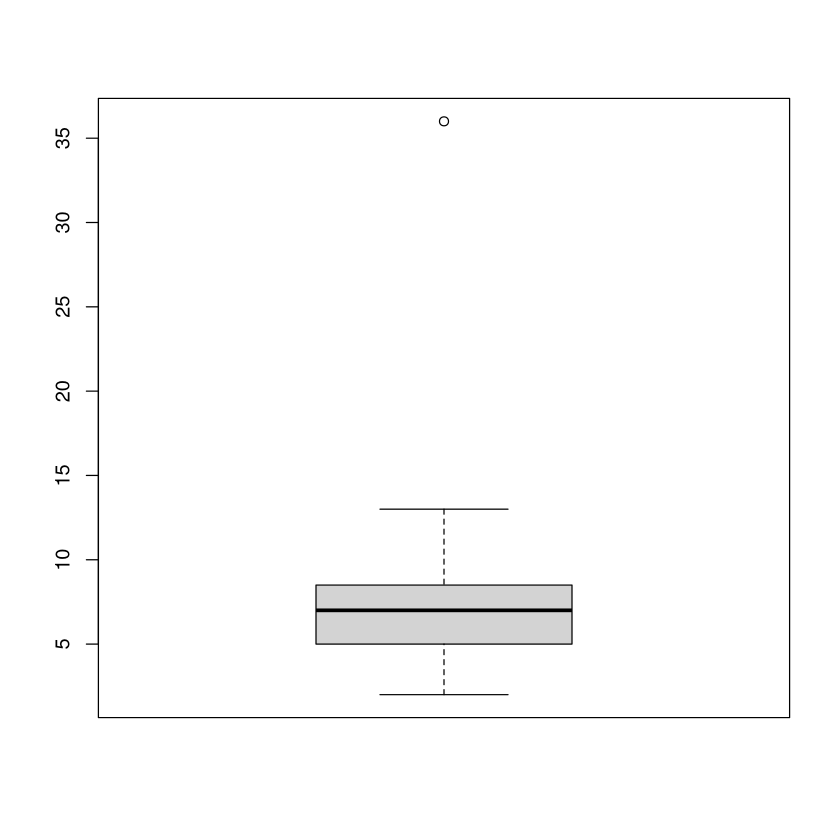

In [13]:
boxplot(data$kotnikove)

[1] 36

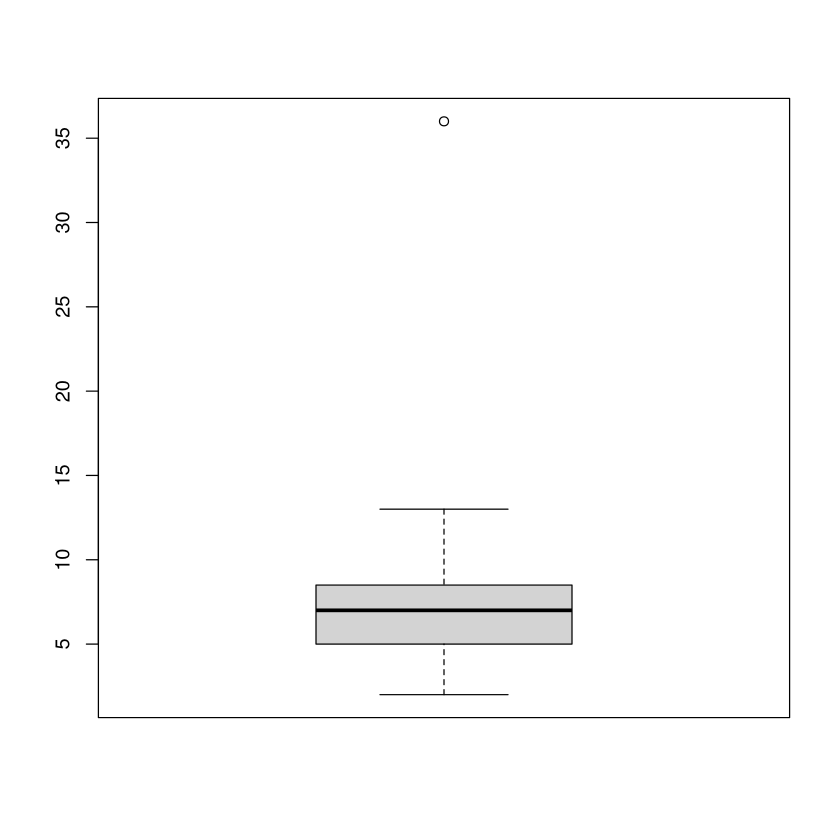

In [15]:
pom = boxplot(data$kotnikove)
pom$out

In [16]:
kot = data$kotnikove
kot[kot==36]=NA

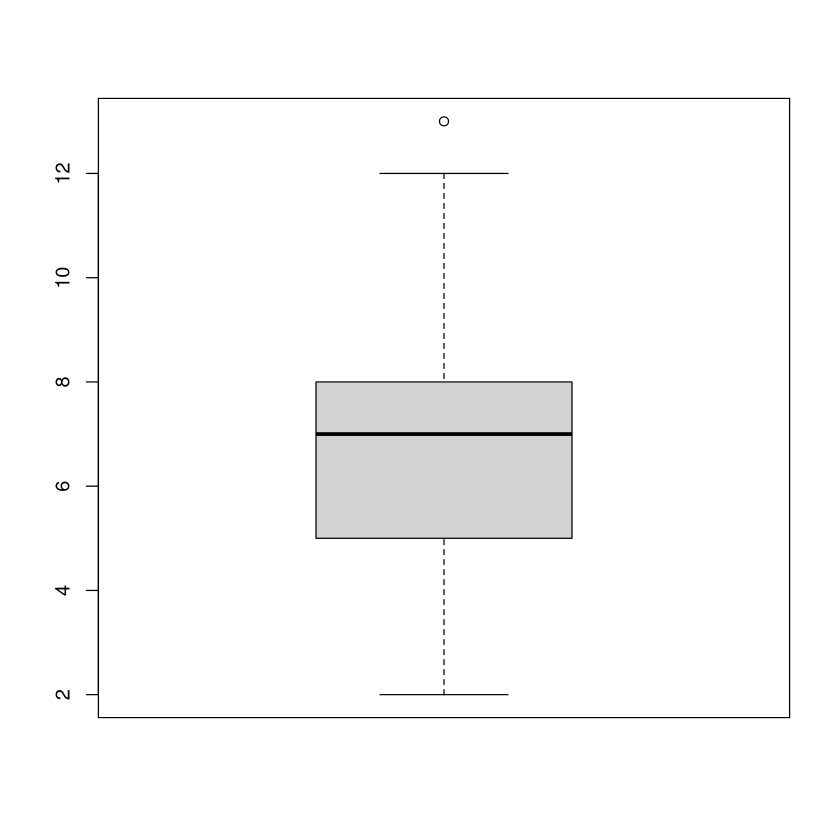

In [17]:
boxplot(kot)

In [18]:
shapiro.test(kot)


	Shapiro-Wilk normality test

data:  kot
W = 0.96628, p-value = 0.4431


In [19]:
t.test(kot)


	One Sample t-test

data:  kot
t = 14.562, df = 29, p-value = 7.202e-15
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 6.045475 8.021192
sample estimates:
mean of x 
 7.033333 


In [20]:
sd(kot,na.rm = T)

[1] 2.645534

In [21]:
t.test(kot,mu=8,alternative = "greater")


	One Sample t-test

data:  kot
t = -2.0014, df = 29, p-value = 0.9726
alternative hypothesis: true mean is greater than 8
95 percent confidence interval:
 6.212644      Inf
sample estimates:
mean of x 
 7.033333 


In [22]:
t.test(kot,mu=8,alternative = "two.sided")


	One Sample t-test

data:  kot
t = -2.0014, df = 29, p-value = 0.05479
alternative hypothesis: true mean is not equal to 8
95 percent confidence interval:
 6.045475 8.021192
sample estimates:
mean of x 
 7.033333 


In [32]:
sden = kot>=10

In [33]:
sden

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE
[13] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE    NA
[25]  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE

In [34]:
sden = na.omit(sden)
sden

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE
[13] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE
[25] FALSE FALSE FALSE FALSE  TRUE FALSE
attr(,"na.action")
[1] 24
attr(,"class")
[1] "omit"

In [35]:
x = sum(sden)
n = length(sden)

In [36]:
table(sden)

sden
FALSE  TRUE 
   24     6 

In [37]:
x
n

[1] 6

[1] 30

In [38]:
p = x/30

In [39]:
p

[1] 0.2

In [40]:
9/(p*(1-p))

[1] 56.25

In [56]:
binom.test(x,n,conf.level = 0.99)


	Exact binomial test

data:  x and n
number of successes = 6, number of trials = 30, p-value = 0.001431
alternative hypothesis: true probability of success is not equal to 0.5
99 percent confidence interval:
 0.05447956 0.44275557
sample estimates:
probability of success 
                   0.2 


In [57]:
binom.test(x,n,conf.level = 0.6)


	Exact binomial test

data:  x and n
number of successes = 6, number of trials = 30, p-value = 0.001431
alternative hypothesis: true probability of success is not equal to 0.5
60 percent confidence interval:
 0.1327085 0.2868855
sample estimates:
probability of success 
                   0.2 


In [42]:
data

kotnikove,podkolenky,obycejne
<dbl>,<dbl>,<dbl>
8,4,12
7,3,10
3,9,9
7,9,11
6,9,10
5,7,6
5,8,9
6,6,9
2,10,7


In [43]:
datas = stack(data)
head(datas)

,values,ind
,<dbl>,<fct>
1,8,kotnikove
2,7,kotnikove
3,3,kotnikove
4,7,kotnikove
5,6,kotnikove
6,5,kotnikove


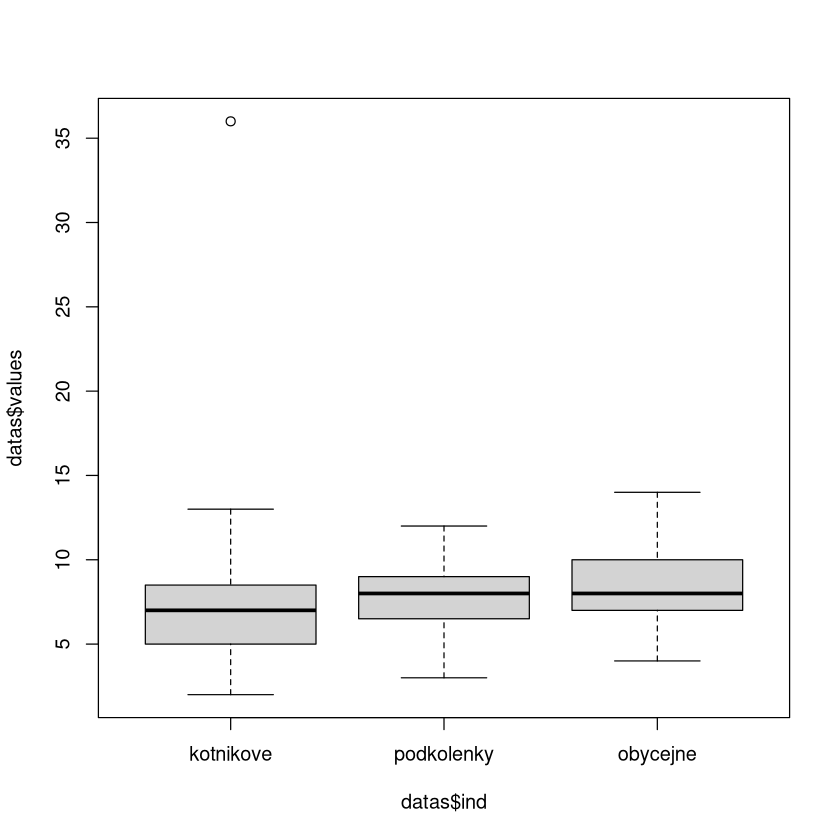

In [44]:
boxplot(datas$values~datas$ind)

In [45]:
datas$values[datas$values==36]=NA

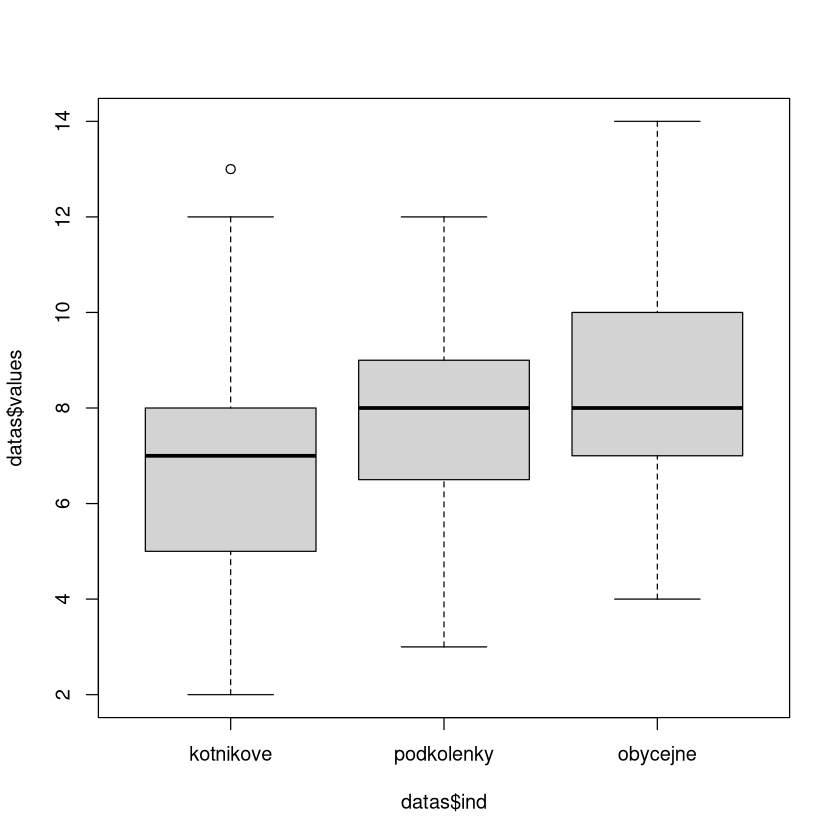

In [46]:
boxplot(datas$values~datas$ind)

In [47]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [48]:
datas %>% group_by(ind) %>% summarise(pnorm = shapiro.test(values)$p.value)

ind,pnorm
<fct>,<dbl>
kotnikove,0.4431195
podkolenky,0.1457793
obycejne,0.1363437


In [49]:
bartlett.test(datas$values ~ datas$ind)


	Bartlett test of homogeneity of variances

data:  datas$values by datas$ind
Bartlett's K-squared = 0.60322, df = 2, p-value = 0.7396


In [50]:
res = aov(datas$values ~ datas$ind)
summary(res)

            Df Sum Sq Mean Sq F value Pr(>F)  
datas$ind    2   48.5  24.272   3.699 0.0286 *
Residuals   89  583.9   6.561                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
1 observation deleted due to missingness

In [51]:
TukeyHSD(res)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = datas$values ~ datas$ind)

$`datas$ind`
                          diff        lwr      upr     p adj
podkolenky-kotnikove 0.5473118 -1.0163210 2.110945 0.6828007
obycejne-kotnikove   1.7408602  0.1772274 3.304493 0.0253059
obycejne-podkolenky  1.1935484 -0.3572148 2.744312 0.1643265


In [53]:
efekty = datas %>% group_by(ind) %>% summarise(mean = mean(values,na.rm = T)) 

In [54]:
total_mean = mean(datas$values,na.rm = T)

In [55]:
efekty$efekt = efekty$mean - total_mean
efekty

ind,mean,efekt
<fct>,<dbl>,<dbl>
kotnikove,7.033333,-0.7710145
podkolenky,7.580645,-0.2237027
obycejne,8.774194,0.9698457
